### From Exploratory Analysis to Feature Engineering

The previous notebook established statistical and structural properties of five
consecutive winter seasons in Almaty.

This notebook translates empirical findings into a principled feature engineering
strategy for time series modeling.

The objective is to define features that:

- capture temporal dependencies,
- incorporate meteorological structure,
- remain interpretable,
- avoid data leakage.

### Target Variable

The modeling objective is to predict the average daily temperature (`tavg`)
for the next day.

Formally, the task is:

    Predict T(t+1) using information available up to time t.

### Temporal Dependence

Time series visualization showed clear temporal continuity in temperature dynamics.
Temperature evolves gradually rather than randomly.

Therefore, past values of temperature are expected to carry predictive information.


In [5]:
import pandas as pd

df = pd.read_csv(
    "../data/processed/winter_2021_2026.csv",
    parse_dates=["date"]
)

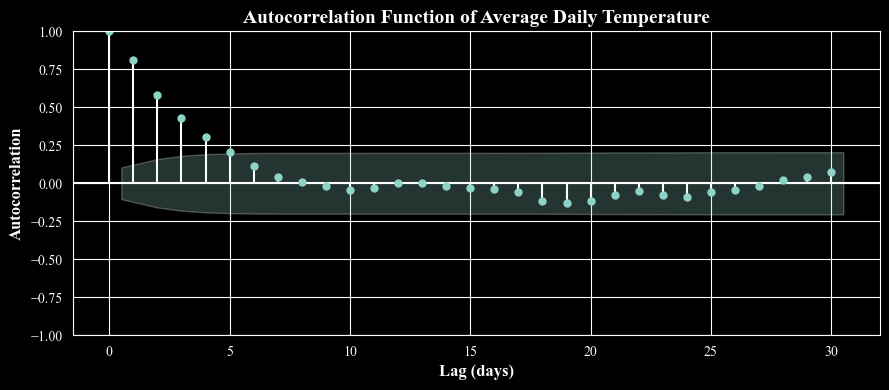

In [9]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

series = df["tavg"].dropna()

fig, ax = plt.subplots(figsize=(9, 4))

plot_acf(series, lags=30, alpha=0.05, ax=ax)

ax.set_title(
    "Autocorrelation Function of Average Daily Temperature",
    fontsize=14,
    fontweight="bold",
    fontname="Times New Roman"
)

ax.set_xlabel(
    "Lag (days)",
    fontsize=12,
    fontweight="bold",
    fontname="Times New Roman"
)

ax.set_ylabel(
    "Autocorrelation",
    fontsize=12,
    fontweight="bold",
    fontname="Times New Roman"
)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname("Times New Roman")

plt.tight_layout()
plt.show()


### Lag Features

Given temporal dependence, lagged values of temperature are natural predictors.

Proposed lag structure:

- tavg_lag_1  → yesterday
- tavg_lag_2  → two days ago
- tavg_lag_3
- tavg_lag_7  → weekly structure

Rationale:
Short-term lags capture immediate persistence.
Lag 7 captures weekly atmospheric cycles.

### Rolling Statistics

Exploratory analysis revealed structured temperature phases
(e.g., cold spells lasting several days).

Rolling statistics summarize local trends and volatility.

Proposed rolling features:

- rolling_mean_3
- rolling_mean_7
- rolling_std_7

These capture:
- short-term smoothing,
- medium-term trend,
- local variability.

### Exogenous Meteorological Variables

Correlation analysis showed meaningful relationships between:

- tmin / tmax and tavg
- sunshine duration and temperature
- snow depth and temperature

These variables will be included with lag structure to preserve causality.

### Cyclical Nature of Wind Direction

Wind direction is measured in degrees (0–360).
Direct numeric encoding introduces artificial discontinuity
between 359° and 0°.

Therefore, wind direction will be transformed using:

    sin(wdir)
    cos(wdir)

This preserves cyclical structure.

### Avoiding Data Leakage

All lag and rolling features must use only past information.

Implementation rule:

- All rolling computations must use shift(1)
- No future observations are allowed in feature construction

### Final Feature Specification

Temperature-based features:
- tavg_lag_1
- tavg_lag_2
- tavg_lag_3
- tavg_lag_7
- rolling_mean_3
- rolling_mean_7
- rolling_std_7

Meteorological lag features:
- tmin_lag_1
- tmax_lag_1
- pres_lag_1
- tsun_lag_1
- prcp_lag_1
- snow_lag_1

Wind features:
- sin_wdir
- cos_wdir
- wspd_lag_1

### Modeling Implications

The final feature set:

- captures temporal persistence,
- incorporates atmospheric structure,
- remains interpretable,
- aligns with physical intuition.

These features will be implemented in `features.py`
and evaluated using time-aware cross-validation.